In [1]:
# 108 페이지

import pandas as pd

df = pd.read_csv("c:/data/titanic/train3.csv")
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


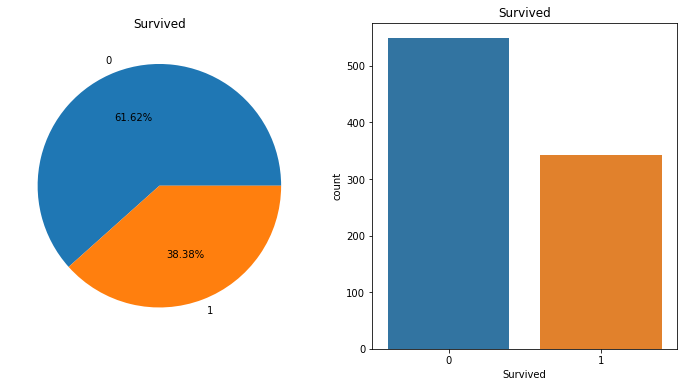

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(12,6))
df['Survived'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<AxesSubplot:>

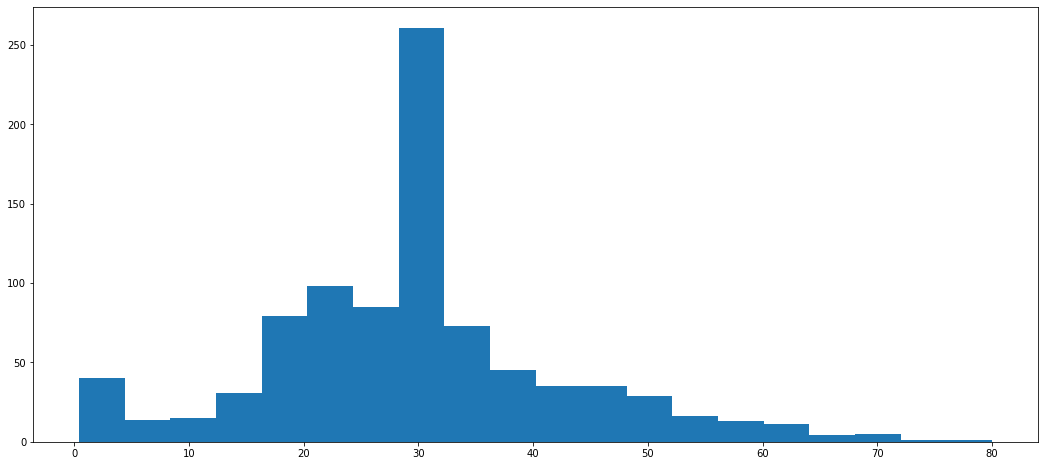

In [3]:
# 승객들의 연령 분포
# bins는 구간. 구간을 20등분 한 것
df['Age'].hist(bins=20, figsize=(18,8), grid=False)

In [4]:
# 객실 등급별 통계
df.groupby('Pclass1').mean()

,Survived,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass1,,,,,,,,,
0,0.305185,0.272593,0.727407,0.674074,0.325926,27.412963,0.557037,0.389630,15.580055
1,0.629630,0.000000,0.000000,0.564815,0.435185,37.089907,0.416667,0.356481,84.154687


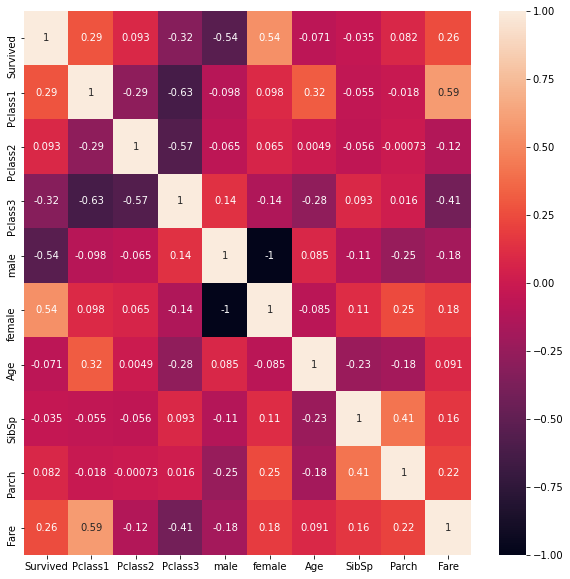

In [5]:
# 상관관계 분석

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linecolor="white")
plt.show()

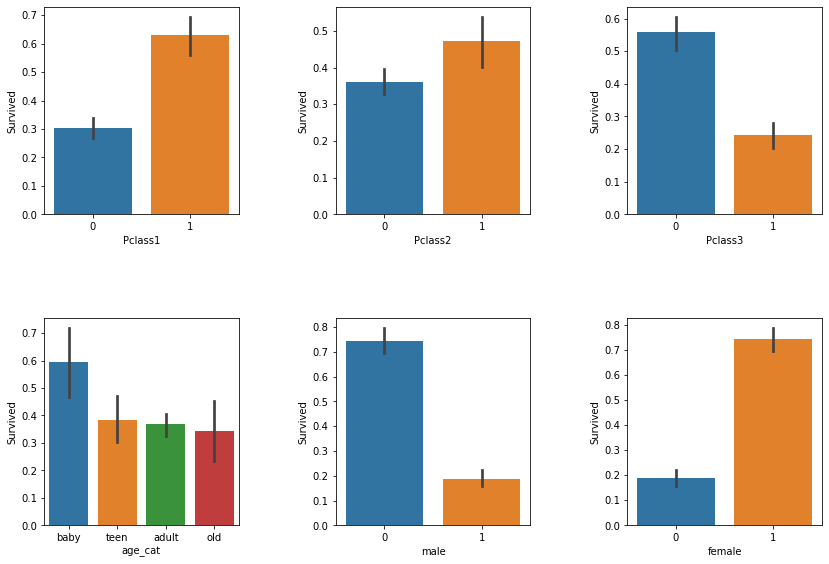

In [6]:
df['age_cat'] = pd.cut(df['Age'], bins=[0, 10, 20, 50, 100], include_lowest=True, labels=['baby', 'teen', 'adult', 'old'])
plt.figure(figsize=[12,8])

plt.subplot(231)
sns.barplot(x='Pclass1', y='Survived', data=df)
plt.subplot(232)
sns.barplot(x='Pclass2', y='Survived', data=df)
plt.subplot(233)
sns.barplot(x='Pclass3', y='Survived', data=df)
plt.subplot(234)
sns.barplot(x='age_cat', y='Survived', data=df)
plt.subplot(235)
sns.barplot(x='male', y='Survived', data=df)
plt.subplot(236)
sns.barplot(x='female', y='Survived', data=df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

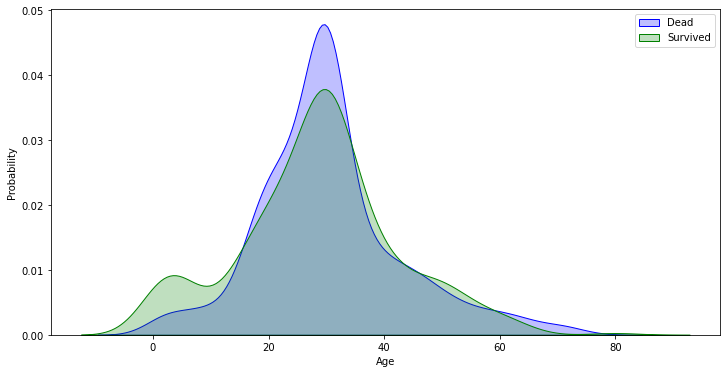

In [7]:
# 나이 분포 곡선

f, ax = plt.subplots(figsize=(12,6))
g = sns.kdeplot(df["Age"][(df["Survived"] == 0)], ax=ax, color='blue', shade=True)
g = sns.kdeplot(df["Age"][(df["Survived"] == 1)], ax=g, color='green', shade=True)
g.set_xlabel("Age")
g.set_ylabel("Probability")
g = g.legend(["Dead", "Survived"])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


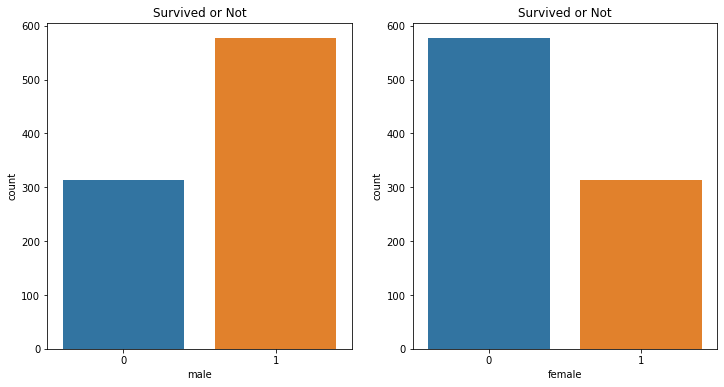

In [8]:
f, ax = plt.subplots(1, 2, figsize=(12,6))
sns.countplot('male', data=df, ax=ax[0])
ax[0].set_title('Survived or Not')
sns.countplot('female', data=df, ax=ax[1])
ax[1].set_title('Survived or Not')
plt.show()

In [9]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
# 언더샘플링

train_cols = df.columns[1:-1] # 위에 age_cat 칼럼을 추가했기 때문에 -1로 제외하고 가야 함
X = df[train_cols]
y = df["Survived"]

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Survived"])
df_samp = pd.concat([X_samp,y_samp], axis=1)

X = X_samp[train_cols]
y = y_samp["Survived"]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=7)

In [12]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense

# keras로 신경망 만듦
# Dense(output, input, 활성화함수)
# len(X_train.columns) = 독립변수의 수, 여기선 9개
model = Sequential()
# model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(32, input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층, 0.0에서 1.0 사이의 값으로
model.compile(loss='mse', optimizer='adam', metrics=['accuracy']) # 평가기준 정확도accuracy

In [ ]:
X_train.boxplot()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

X_train_scaled.boxplot()

In [ ]:
from joblib import dump

# 스케일링된 모델 저장
dump(scaler, '/Users/ian/Desktop/Study/data/titanic/scaler.model', compress=True)

In [ ]:
# 모델 학습

hist = model.fit(X_train_scaled, y_train, epochs=300)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.show()

In [ ]:
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print("%s: %.2f%%"%(model.metrics_names[1],scores[1]*100))

scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%"%(model.metrics_names[1],scores[1]*100))

In [ ]:
import numpy as np

person1 = np.array([0, 0, 1, 1, 0, 19, 2, 0, 50]).reshape(1,9)
person2 = np.array([1, 0, 0, 0, 1, 17, 0, 2, 30]).reshape(1,9)
person3 = np.array([0, 1, 0, 0, 1, 50, 1, 1, 70]).reshape(1,9)

# 스케일링
person1 = scaler.transform(person1)
person2 = scaler.transform(person2)
person3 = scaler.transform(person3)

print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))

In [ ]:
model.save('/Users/ian/Desktop/Study/data/titanic')

In [ ]:
# 실습예제6 영화리뷰 분석

In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data[0]) # 단어마다 번호가 매겨져 라벨링되어 있음
print(train_labels[0]) # 1은 긍정 리뷰
print(max([max(sequence) for sequence in train_data]))

In [ ]:
word_index = imdb.get_word_index()
print(list(word_index.items())[:10])

# 라벨 번호와 단어 x축 y축 변경
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(list(reverse_word_index.items())[:10])

In [ ]:
import numpy as np

# 단어수를 10000자로 해서 빈 자리는 0으로 채움. 제로패딩
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# 1, 0으로 되어 있는 y값을 sigmoid 출력을 위해 실수형으로 바꿈

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# train, validation 분리. validation은 학습에 간접적으로 참여하는 데이터

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test[:1000], y_test[:1000], verbose=0)

In [ ]:
# 앞에는 손실, 뒤에는 정확도

results

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,6)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 이 값이 커질수록 과적합이 된다는 뜻
plt.legend()
plt.show()

In [ ]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()
plt.show()

In [ ]:
model.predict(x_test[:1000])

In [ ]:
# 실습예제7 뉴스분류

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
word_index = reuters.get_word_index()
print(list(word_index.items())[:10])

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(list(reverse_word_index.items())[:10])

[('mdbl', 10996), ('fawc', 16260), ('degussa', 12089), ('woods', 8803), ('hanging', 13796), ('localized', 20672), ('sation', 20673), ('chanthaburi', 20675), ('refunding', 10997), ('hermann', 8804)]
[(10996, 'mdbl'), (16260, 'fawc'), (12089, 'degussa'), (8803, 'woods'), (13796, 'hanging'), (20672, 'localized'), (20673, 'sation'), (20675, 'chanthaburi'), (10997, 'refunding'), (8804, 'hermann')]


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # 0일 확률부터 46일 확률까지 확률분포. 128페이지에 설명!
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

2021-12-27 11:59:50.553898: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [7]:
history = model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/5
16/16 [==============================] - 4s 112ms/step - loss: 2.6449 - accuracy: 0.5165 - val_loss: 1.7746 - val_accuracy: 0.6410
Epoch 2/5
16/16 [==============================] - 1s 50ms/step - loss: 1.4475 - accuracy: 0.7015 - val_loss: 1.3176 - val_accuracy: 0.7070
Epoch 3/5
16/16 [==============================] - 1s 51ms/step - loss: 1.0665 - accuracy: 0.7784 - val_loss: 1.1498 - val_accuracy: 0.7540
Epoch 4/5
16/16 [==============================] - 1s 47ms/step - loss: 0.8357 - accuracy: 0.8285 - val_loss: 1.0478 - val_accuracy: 0.7790
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 1.0122 - accuracy: 0.7750


In [9]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 1s 9ms/step - loss: 1.0295 - accuracy: 0.7743


[1.0295056104660034, 0.7742653489112854]

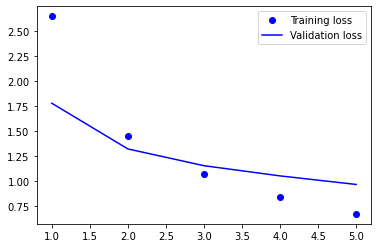

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

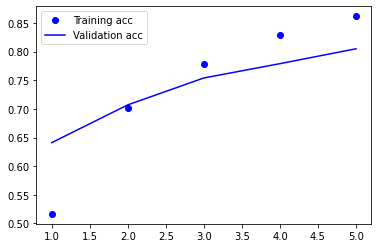

In [12]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()
plt.show()

In [13]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [14]:
np.sum(predictions[0])

1.0

In [15]:
np.argmax(predictions[0])

3